# Shotglass: Coreutils code information

## releases over time



In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import shotlib
from shotlib import select1, selectall

db,_curs = shotlib.get_db()
print(select1(_curs, 'select sqlite_version()'))

3.36.0


In [6]:
releases_df = pd.read_sql_query(
    'select tag, creator_dt from releases limit 3', db)

# convert raw list of tuples to DataFrame
# > releases_df = selectall(db, 'select tag, creator_dt from releases limit 3')
# > df = pandas.DataFrame(releases, columns=['tag', 'creator_dt'])


In [7]:

releases_by_year_sql = '''
select strftime('%Y', creator_dt) as year,
count(*) as yearly_releases
from releases
group by 1
'''
releases_df = pd.read_sql_query(releases_by_year_sql, db)
releases_df.head()


,year,yearly_releases
0,1993,3
1,1995,11
2,1996,65
3,1997,19
4,1998,28


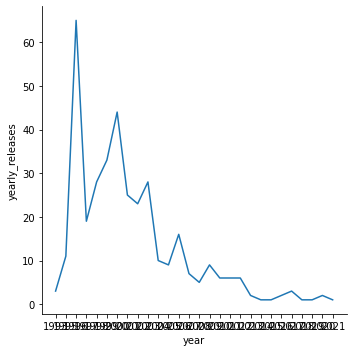

In [16]:
sns.relplot(data=releases_df, x='year', y='yearly_releases', kind='line')


In [18]:
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# releases_by_month_sql = '''
# select strftime('%Y', creator_dt) as month,
# count(*) as monthly_releases
# from releases
# group by 1
# '''
# releases_df = pd.read_sql_query(releases_by_month_sql, db)
# releases_df.head()
# sns.heatmap(releases_df)
# , mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})